# NRV Demo notebook n. 1
# BIOCAS 2024

Welcome to NRV's demonstration. If you are here, you should be trying to test the framework online on your internet browser, please relax and let's explore what you can do with it.

## What we will do in this demo
Here we demonstrate the basic functionality of NRV on a single axonal fiber and explore conventional and kHz (propagation block) stimulation waveforms. Basically the geometry of the problem will be simple: a single unmyelinated fiber is considered (diameter $D = 1\mu m$ and a length of $5mm$). A point-source (i.e. infinitely small) electrode will be placed in the middle of the axon, placed $100\mu m$ far away from the center of the fiber.

We will stimulate with:
1. A $60\mu s$ square pulse (conventional) cathodic (negative) stimulation, charged balanced. This waveform will induce an activity that should propagate in both direction along the fiber (so we will check the results with extra care!)
2. A $10kHz$ sinusoidal stimulation as performed in propagation block. As with should observe the block, we will have to force the generation of an action potential at one side of the fiber and observe if it crosses the nearest position to the electrode or not.

Let's dive into this scenario

## Importing the framework and general philosophy
NRV is a pythonic librairy, so it is designed using Object Oriented Programming concepts: the user deals with instances of objects defined in classes, on which methods are applied. To describe the electro-physiological setup, software objects are directly the same as the physical objects. We will load the framework and then use a `axon`-object as well as a `electrode`-object. We defined two different waveforms, so you can easily guess we will also need to define two `waveform`-object instances. The electrode is in a physical material, look at the code there is also a given object for that. The rest of the following code (variables) is just here for clarity:


In [10]:
import nrv
import matplotlib.pyplot as plt

y = 0                       # axon y position, in [um]
z = 0                       # axon z position, in [um]
d = 1                       # axon diameter, in [um]
L = 5000                    # axon length, along x axis, in [um]
axon1 = nrv.unmyelinated(y,z,d,L)

# material properties
epineurium = nrv.load_material('endoneurium_bhadra')

# electrode
x_elec = L/2                # electrode x position, in [um]
y_elec = 100                # electrode y position, in [um]
z_elec = 0                  # electrode y position, in [um]
E1 = nrv.point_source_electrode(x_elec,y_elec,z_elec)

# stimulus
start = 2
I_cathod = 500
I_anod = I_cathod/5
T_cathod = 60e-3
T_inter = 40e-3
stim1 = nrv.stimulus()
stim1.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)

# material properties
epineurium = nrv.load_material('endoneurium_bhadra')


Simple so far, isn't it? Oh... I just forgot to tell you that we need to connect all those guys. But guess what, there is an object for that:

In [11]:
# extracellular stimulation setup
extra_stim = nrv.stimulation(epineurium)
extra_stim.add_electrode(E1, stim1)
axon1.attach_extracellular_stimulation(extra_stim)

## First result
The only thing left is the simulation itself, and just a bit of postprocessing:

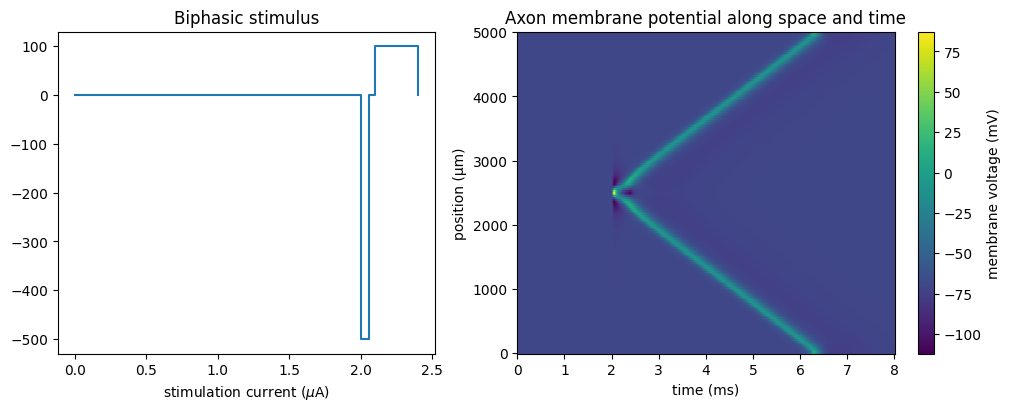

In [14]:
results = axon1.simulate(t_sim=8)
# del axon1

fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 4))

stim1.plot(axs[0])
axs[0].set_title('Biphasic stimulus')
axs[0].set_xlabel('time (ms)')
axs[0].set_xlabel('stimulation current ($\mu$A)')

map = axs[1].pcolormesh(results['t'], results['x_rec'], results['V_mem'] ,shading='auto')
axs[1].set_title('Axon membrane potential along space and time')
axs[1].set_xlabel('time (ms)')
axs[1].set_ylabel('position (µm)')
cbar = plt.colorbar(map)
cbar.set_label('membrane voltage (mV)')

plt.show()

There it is: on the left of the figure, you can observe the biphasic stimulus. no value is continued after the last '0' in the signal as by default the last numerical value for a stimulation is used if undefined. On the right, the membrane potential along the position in the axon (*y-axis*) is plotted versus time (*x-axis*). Near the mid position ($2500\mu m$) a local depolarization can be observed, leading to a propagating action potential (positive potential in yellow color), that effectively propagates to both directions.